In [6]:
 pip install pyblp

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyblp
import numpy as np
import pandas as pd

## Loading data

In [112]:
product_data = pd.read_csv("mktdata.csv")
product_data.head()

,market_ids,product_ids,brand_ids,tienda,semana,ventas,cantidad,prices,descuento,shares,...,demand_instruments26,demand_instruments27,demand_instruments28,demand_instruments29,demand_instruments30,demand_instruments31,d_brand1,d_brand2,d_brand3,d_brand4
0,S10T100,8,3,100,10,6,30608,3.32,0.0,0.024459,...,7.016253,3.776892,2.361033,7.733027,2.730177,4.406291,0,0,1,0
1,S10T100,6,2,100,10,3,30608,8.39,0.0,0.012229,...,1.753970,1.776536,2.798557,2.586911,3.847081,3.906528,0,1,0,0
2,S10T100,2,1,100,10,14,30608,5.00,0.0,0.057070,...,4.711492,4.229141,1.874157,4.152066,1.036039,4.253847,1,0,0,0
3,S10T100,7,3,100,10,2,30608,2.91,0.5,0.008153,...,3.815056,7.844739,3.018876,3.202536,6.306767,4.462542,0,0,1,0
4,S10T100,10,4,100,10,11,30608,1.69,0.0,0.044841,...,0.859213,3.035931,3.868840,0.724425,3.993279,4.565195,0,0,0,1


In [113]:
column_names =product_data.columns.tolist()
print(column_names)

['market_ids', 'product_ids', 'brand_ids', 'tienda', 'semana', 'ventas', 'cantidad', 'prices', 'descuento', 'shares', 'demand_instruments0', 'demand_instruments1', 'demand_instruments2', 'demand_instruments3', 'demand_instruments4', 'demand_instruments5', 'demand_instruments6', 'demand_instruments7', 'demand_instruments8', 'demand_instruments9', 'demand_instruments10', 'demand_instruments11', 'demand_instruments12', 'demand_instruments13', 'demand_instruments14', 'demand_instruments15', 'demand_instruments16', 'demand_instruments17', 'demand_instruments18', 'demand_instruments19', 'demand_instruments20', 'demand_instruments21', 'demand_instruments22', 'demand_instruments23', 'demand_instruments24', 'demand_instruments25', 'demand_instruments26', 'demand_instruments27', 'demand_instruments28', 'demand_instruments29', 'demand_instruments30', 'demand_instruments31', 'd_brand1', 'd_brand2', 'd_brand3', 'd_brand4']


In [87]:
product_data=product_data[product_data.columns[~product_data.columns.isin([ 'tienda','semana','ventas','cantidad'])]]

In [135]:
product_data.head()

,market_ids,product_ids,brand_ids,tienda,semana,ventas,cantidad,prices,descuento,shares,...,demand_instruments28,demand_instruments29,demand_instruments30,demand_instruments31,d_brand1,d_brand2,d_brand3,d_brand4,costs,firm_ids
0,S10T100,8,3,100,10,6,30608,3.32,0.0,0.024459,...,2.361033,7.733027,2.730177,4.406291,0,0,1,0,2.07,3
1,S10T100,6,2,100,10,3,30608,8.39,0.0,0.012229,...,2.798557,2.586911,3.847081,3.906528,0,1,0,0,5.76,2
2,S10T100,2,1,100,10,14,30608,5.00,0.0,0.057070,...,1.874157,4.152066,1.036039,4.253847,1,0,0,0,3.51,1
3,S10T100,7,3,100,10,2,30608,2.91,0.5,0.008153,...,3.018876,3.202536,6.306767,4.462542,0,0,1,0,1.88,3
4,S10T100,10,4,100,10,11,30608,1.69,0.0,0.044841,...,3.868840,0.724425,3.993279,4.565195,0,0,0,1,0.90,4


In [134]:
product_data['costs'] = product_data['demand_instruments0']
product_data['firm_ids'] = product_data['brand_ids']

In [93]:
#Using a simpler, non-default Optimization configuration that doesn’t support parameter bounds, 
# and use a relatively loose tolerance so the problems are solved quickly
bfgs = pyblp.Optimization('bfgs', {'gtol': 1e-4})
bfgs

Configured to optimize using the BFGS algorithm implemented in SciPy with analytic gradients and options {gtol: +1.000000E-04}.

## Adding Demographics 

In [ ]:
#To add demographic data we need to make two changes:
#1. We need to load agent_data, which for this cereal problem contains pre-computed Monte Carlo draws and demographics.
#2. We need to add an agent_formulation to the model.

In [136]:
agent_data = pd.read_csv("demodata.csv")
agent_data.head()

,market_ids,person_ids,ingreso,weights,nodes0,nodes1,nodes2,nodes3,nodes4,v_person,income
0,S10T100,1,10.03658,0.05,-0.000160,-0.000048,0.000494,0.000543,0.001808,-1.045341,9.929032
1,S10T100,2,10.03658,0.05,0.001489,0.000433,-0.000187,0.001628,0.000516,-0.046050,11.131800
2,S10T100,3,10.03658,0.05,-0.000370,0.000614,0.000693,-0.000841,0.000993,-1.483248,9.996748
3,S10T100,4,10.03658,0.05,-0.000073,-0.000299,0.000016,0.000408,-0.000543,2.578345,10.134620
4,S10T100,5,10.03658,0.05,-0.000100,0.001151,0.001953,-0.000586,0.000486,0.636036,11.098460


In [137]:
agent_formulation = pyblp.Formulation('1 + v_person+ income')
agent_formulation

1 + v_person + income

In [139]:
initial_sigma = np.diag([0.3, 0.2,0.2,0.2,0.2])
initial_pi = np.array([
[ 0.5, 0,-0.5 ],
[0,0.2 ,0],[0,0.2 ,0],[0,0.2 ,0],[0,0.2 ,0]
])

In [141]:
#Definition of variables (or vectors)
X1_formulation = pyblp.Formulation('0 + prices+ descuento+C(brand_ids)')
X2_formulation = pyblp.Formulation('0 + prices+C(brand_ids)')
product_formulations = (X1_formulation, X2_formulation)
product_formulations


(prices + descuento + C(brand_ids), prices + C(brand_ids))

In [142]:


tp_problem = pyblp.Problem(
product_formulations,
product_data,
agent_formulation,
agent_data
)
tp_problem

Initializing the problem ...
Initialized the problem after 00:00:01.

Dimensions:
 T      N     F     I     K1    K2    D    MD 
----  -----  ---  -----  ----  ----  ---  ----
3504  38544   4   70080   6     5     3    37 

Formulations:
       Column Indices:           0          1             2             3             4             5      
-----------------------------  ------  ------------  ------------  ------------  ------------  ------------
 X1: Linear Characteristics    prices   descuento    brand_ids[1]  brand_ids[2]  brand_ids[3]  brand_ids[4]
X2: Nonlinear Characteristics  prices  brand_ids[1]  brand_ids[2]  brand_ids[3]  brand_ids[4]              
       d: Demographics           1       v_person       income                                             


Dimensions:
 T      N     F     I     K1    K2    D    MD 
----  -----  ---  -----  ----  ----  ---  ----
3504  38544   4   70080   6     5     3    37 

Formulations:
       Column Indices:           0          1             2             3             4             5      
-----------------------------  ------  ------------  ------------  ------------  ------------  ------------
 X1: Linear Characteristics    prices   descuento    brand_ids[1]  brand_ids[2]  brand_ids[3]  brand_ids[4]
X2: Nonlinear Characteristics  prices  brand_ids[1]  brand_ids[2]  brand_ids[3]  brand_ids[4]              
       d: Demographics           1       v_person       income                                             

In [143]:
tighter_bfgs = pyblp.Optimization('bfgs', {'gtol': 1e-5})
nevo_results = tp_problem.solve(
initial_sigma,
initial_pi,
optimization=tighter_bfgs,
    method='1s'
)
nevo_results

Solving the problem ...

Nonlinear Coefficient Initial Values:
   Sigma:        prices      brand_ids[1]   brand_ids[2]   brand_ids[3]   brand_ids[4]   |      Pi:             1          v_person        income    
------------  -------------  -------------  -------------  -------------  -------------  |  ------------  -------------  -------------  -------------
   prices     +3.000000E-01                                                              |     prices     +5.000000E-01  +0.000000E+00  -5.000000E-01
brand_ids[1]  +0.000000E+00  +2.000000E-01                                               |  brand_ids[1]  +0.000000E+00  +2.000000E-01  +0.000000E+00
brand_ids[2]  +0.000000E+00  +0.000000E+00  +2.000000E-01                                |  brand_ids[2]  +0.000000E+00  +2.000000E-01  +0.000000E+00
brand_ids[3]  +0.000000E+00  +0.000000E+00  +0.000000E+00  +2.000000E-01                 |  brand_ids[3]  +0.000000E+00  +2.000000E-01  +0.000000E+00
brand_ids[4]  +0.000000E+00  +0.00000

Problem Results Summary:
GMM     Objective      Gradient         Hessian         Hessian     Clipped  Weighting Matrix  Covariance Matrix
Step      Value          Norm       Min Eigenvalue  Max Eigenvalue  Shares   Condition Number  Condition Number 
----  -------------  -------------  --------------  --------------  -------  ----------------  -----------------
 1    +6.960075E+02  +8.658128E+01  -4.296021E+01   +4.596249E+02      0      +6.396976E+06      +1.756718E+16  

Cumulative Statistics:
Computation  Optimizer  Optimization   Objective   Fixed Point  Contraction
   Time      Converged   Iterations   Evaluations  Iterations   Evaluations
-----------  ---------  ------------  -----------  -----------  -----------
 00:33:53       No           1            28         2429640      7380508  

Nonlinear Coefficient Estimates (Robust SEs in Parentheses):
   Sigma:         prices        brand_ids[1]     brand_ids[2]     brand_ids[3]     brand_ids[4]    |      Pi:              1         

## Elasticidad

In [144]:
# Acá se calculan las elasticidades
elasticities = nevo_results.compute_elasticities()

Computing elasticities with respect to prices ...
Finished after 00:00:03.



In [145]:
# Fijamos un mercado de ejemplo 
# Aquí se hace de ejemplo el mercado de ciudad 1 quarter 1.
# Nosotros debemos hacer para semana 10 tienda 9 'S10T9'
single_market = product_data['market_ids'] == 'S10T9'

In [146]:
# Elasticidades para el mercado C01Q1
# En este caso da una matriz 11x11
elasticities[single_market]

array([[-8.13892946e-01,  3.42627028e-03,  1.74866057e-02,
         2.22010824e-02,  2.36685720e-02,  6.82632961e-02,
         1.63723276e-02,  1.03665245e-02, -1.08118734e-03,
         2.13976655e-02,  3.27639104e-02],
       [ 6.32907433e-02, -9.25153859e-01,  2.66843828e-02,
         3.37925624e-02,  3.64429215e-02,  1.12613332e-01,
         2.52529245e-02,  1.63132342e-02,  2.05984100e-03,
         3.77942913e-02,  5.02607083e-02],
       [ 8.91967298e-02,  7.36854943e-03, -7.20707959e-01,
         4.49699234e-02,  4.80783161e-02,  1.49839528e-01,
         3.32576671e-02,  2.15088382e-02,  4.27955716e-03,
         5.09510762e-02,  6.61735292e-02],
       [ 9.90510659e-02,  8.16183011e-03,  3.93336036e-02,
        -4.79007156e-01,  5.37561637e-02,  1.65502088e-01,
         3.69924625e-02,  2.38473334e-02,  5.07596673e-03,
         5.65159965e-02,  7.35487053e-02],
       [ 8.67081321e-02,  7.22740486e-03,  3.45297638e-02,
         4.41398689e-02, -7.21805167e-01,  1.46360140e-01,
  

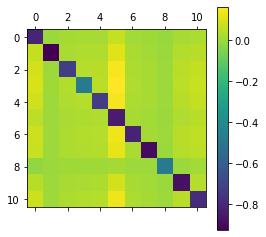

In [147]:
#La matriz en gráfico... porque soy fachero
import matplotlib.pyplot as plt
plt.colorbar(plt.matshow(elasticities[single_market]));

# Costos marginales

In [150]:
# Computamos los costos
costs = nevo_results.compute_costs()

Computing marginal costs ...
Finished after 00:00:06.



In [151]:
# Mercado escogido
# En este caso da una matriz 11x11 (24 productos únicos en dataset) 
single_market = product_data['market_ids'] == 'S10T9'

In [152]:
# Matriz de costos (#24 filas por 24 productos)
costs[single_market]

array([[-2.62387874],
       [-0.70886489],
       [-1.31103037],
       [-1.87147322],
       [-1.35999574],
       [-1.85095563],
       [-1.01933356],
       [-0.8217444 ],
       [-9.50041323],
       [-1.0393322 ],
       [-2.17373254]])

In [173]:
## Costos reales en el mercado
filt_product_data = product_data[product_data['market_ids'] == 'S10T9']
filt_product_data["costs"]

704    5.66
705    1.92
706    1.79
707    0.94
708    2.10
709    3.29
710    2.08
711    3.71
712    5.76
713    3.46
714    2.10
Name: costs, dtype: float64

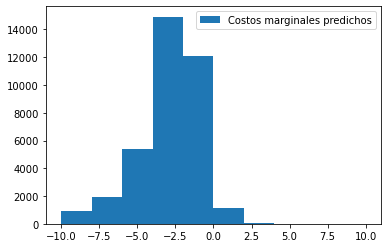

In [175]:
# Gráfico de costos marginales para ser facheros (de todos los mercados)
plt.hist(costs, range=[-10,10]);
plt.legend(["Costos marginales predichos"]);

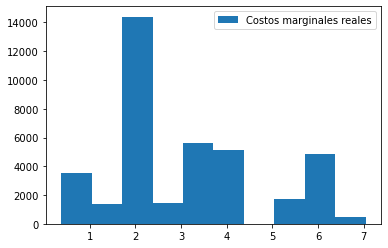

In [174]:
plt.hist(product_data["costs"]);
plt.legend(["Costos marginales reales"]);

## Fusiones

In [154]:
# Definimos un vector para los precios
prices = product_data['prices'].values.reshape(-1, 1)
prices

array([[3.32],
       [8.39],
       [5.  ],
       ...,
       [5.24],
       [5.29],
       [2.83]])

In [155]:
#Para calcular los resultados posteriores a la fusión, crearemos un nuevo conjunto de ID de empresas 
# que representen una fusión de las empresas 2 y 1.
# Se crea una variable "merger_ids" donde se reemplaza el valor de dos por uno -> la empresa 1 y 2 son una sola empresa
product_data['merger_ids'] = product_data['firm_ids'].replace(2, 1)
product_data

,market_ids,product_ids,brand_ids,tienda,semana,ventas,cantidad,prices,descuento,shares,...,demand_instruments29,demand_instruments30,demand_instruments31,d_brand1,d_brand2,d_brand3,d_brand4,costs,firm_ids,merger_ids
0,S10T100,8,3,100,10,6,30608,3.32,0.0,0.024459,...,7.733027,2.730177,4.406291,0,0,1,0,2.07,3,3
1,S10T100,6,2,100,10,3,30608,8.39,0.0,0.012229,...,2.586911,3.847081,3.906528,0,1,0,0,5.76,2,1
2,S10T100,2,1,100,10,14,30608,5.00,0.0,0.057070,...,4.152066,1.036039,4.253847,1,0,0,0,3.51,1,1
3,S10T100,7,3,100,10,2,30608,2.91,0.5,0.008153,...,3.202536,6.306767,4.462542,0,0,1,0,1.88,3,3
4,S10T100,10,4,100,10,11,30608,1.69,0.0,0.044841,...,0.724425,3.993279,4.565195,0,0,0,1,0.90,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38539,S9T98,1,1,98,9,22,32516,3.33,0.0,0.057004,...,4.591239,8.718320,4.474347,1,0,0,0,2.13,1,1
38540,S9T98,10,4,98,9,36,32516,1.77,0.0,0.093279,...,3.796571,2.757190,4.625028,0,0,0,1,0.94,4,4
38541,S9T98,11,4,98,9,55,32516,5.24,1.0,0.142510,...,3.996440,0.950184,4.308583,0,0,0,1,2.08,4,4
38542,S9T98,5,2,98,9,8,32516,5.29,0.0,0.020729,...,1.786144,3.171079,4.277875,0,1,0,0,3.46,2,1


In [157]:
# Creamos la variable "changed_prices" que es el cambio de precios luego de la fusión
changed_prices = nevo_results.compute_prices(
firm_ids=product_data['merger_ids'],
costs=costs
)

Solving for equilibrium prices ...
Finished 30 out of 3504 after 00:01:00.
Finished 56 out of 3504 after 00:02:01.
Finished 80 out of 3504 after 00:03:00.
Finished 109 out of 3504 after 00:04:01.
Finished 139 out of 3504 after 00:05:01.
Finished 167 out of 3504 after 00:06:01.
Finished 194 out of 3504 after 00:07:01.
Finished 220 out of 3504 after 00:08:02.
Finished 248 out of 3504 after 00:09:00.
Finished 279 out of 3504 after 00:10:00.
Finished 310 out of 3504 after 00:11:01.
Finished 339 out of 3504 after 00:12:02.
Finished 368 out of 3504 after 00:13:01.
Finished 395 out of 3504 after 00:14:02.
Finished 421 out of 3504 after 00:15:00.
Finished 450 out of 3504 after 00:16:01.
Finished 480 out of 3504 after 00:17:02.
Finished 509 out of 3504 after 00:18:00.
Finished 560 out of 3504 after 00:19:00.
Finished 616 out of 3504 after 00:20:01.
Finished 676 out of 3504 after 00:21:01.
Finished 730 out of 3504 after 00:22:01.
Finished 785 out of 3504 after 00:23:01.
Finished 844 out of 3504 

In [158]:
# Vector de nuevos precios para cada marca después de la fusión
changed_prices

array([[ 9.82880153e+02],
       [-9.61236625e+00],
       [ 7.72906628e+01],
       ...,
       [-2.11311972e+01],
       [-4.60318957e+04],
       [-2.05275130e+01]])

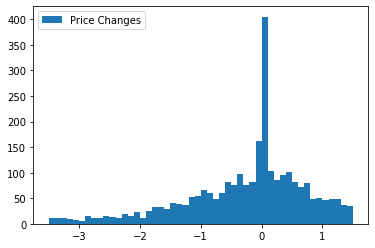

In [161]:
# Gráfico de cambio
plt.hist(changed_prices - prices,range=[-3.5,1.5], bins=50);
plt.legend(["Price Changes"]);